In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import sklearn
import os
import os
import numpy as np
import concurrent.futures
from skimage.feature import hog
from skimage import exposure
from skimage.feature import local_binary_pattern
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from PIL import Image
import sys
import seaborn as sns

os.environ['MOMAPS_HOME'] = '/home/labs/hornsteinlab/Collaboration/MOmaps'

sys.path.insert(1, os.getenv('MOMAPS_HOME'))
sys.path.insert(1, os.getenv("MOMAPS_HOME"))
print(f"MOMAPS_HOME: {os.getenv('MOMAPS_HOME')}")


%reload_ext autoreload
%autoreload 2
%aimport

%matplotlib inline

MOMAPS_HOME: /home/labs/hornsteinlab/Collaboration/MOmaps
Modules to reload:
all-except-skipped

Modules to skip:



In [3]:
df_original = pd.read_csv("/home/labs/hornsteinlab/Collaboration/MOmaps/sandbox/outliers_detection/raw_metrics_all_batches_all_metrics_site_fix.csv")
df_fus = pd.read_csv("/home/labs/hornsteinlab/Collaboration/MOmaps/sandbox/outliers_detection/brenner_values/raw_metrics_fus_fixed200224_2.csv")

df_original['Source'] = 'Original'
df_fus['Source'] = 'FUS_Perturbations'

df_original['Marker'].replace('SCNA', 'SNCA', inplace=True)

In [4]:
df_original

,Path,RootFolder,Marker,Condition,CellLine,Batch_Rep,Rep,Batch,Target_SNR,Target_Sharpness_Laplacian,Target_Var,Target_Sharpness_Brenner,Target_Entropy,Target_Sigma,Target_HighFreq,Source
0,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,CLTC,Untreated,FUSHeterozygous,batch7/rep1,rep1,batch7,0.850756,0.008628,0.011907,5868.4023,7.468317,0.013629,52.320055,Original
1,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,CLTC,Untreated,FUSHeterozygous,batch7/rep1,rep1,batch7,0.953252,0.011355,0.013362,7576.9150,7.561110,0.016215,55.235707,Original
2,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,CLTC,Untreated,FUSHeterozygous,batch7/rep1,rep1,batch7,0.923778,0.010157,0.012464,6877.3916,7.507316,0.015318,54.116606,Original
3,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,CLTC,Untreated,FUSHeterozygous,batch7/rep1,rep1,batch7,0.848088,0.007071,0.010218,4901.5420,7.495473,0.012316,50.125424,Original
4,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,CLTC,Untreated,FUSHeterozygous,batch7/rep1,rep1,batch7,0.852414,0.007766,0.010769,5399.5625,7.513944,0.012947,51.157262,Original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431838,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,mitotracker,stress,WT,batch9/rep2,rep2,batch9,0.714661,0.005919,0.010440,6417.3070,7.700074,0.010245,46.264940,Original
431839,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,mitotracker,stress,WT,batch9/rep2,rep2,batch9,0.727502,0.006504,0.013022,7909.5280,8.130622,0.009898,46.320257,Original
431840,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,mitotracker,stress,WT,batch9/rep2,rep2,batch9,1.033643,0.012032,0.014817,12085.6010,8.424665,0.016233,53.744809,Original
431841,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,mitotracker,stress,WT,batch9/rep2,rep2,batch9,0.841155,0.008018,0.012219,8705.3890,8.133886,0.012253,49.199013,Original


In [6]:
df_fus

,Path,RootFolder,Marker,Condition,CellLine,Batch_Rep,Rep,Batch,Target_Sharpness_Brenner,Source
0,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,CLTC,BMAA,FUSHeterozygous,batch1/rep1,rep1,batch1,4053.3398,FUS_Perturbations
1,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,CLTC,BMAA,FUSHeterozygous,batch1/rep1,rep1,batch1,3466.9185,FUS_Perturbations
2,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,CLTC,BMAA,FUSHeterozygous,batch1/rep1,rep1,batch1,4063.2144,FUS_Perturbations
3,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,CLTC,BMAA,FUSHeterozygous,batch1/rep1,rep1,batch1,3717.0642,FUS_Perturbations
4,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,CLTC,BMAA,FUSHeterozygous,batch1/rep1,rep1,batch1,2997.6187,FUS_Perturbations
...,...,...,...,...,...,...,...,...,...,...
190395,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,NEMO,Untreated,KOLF,batch1/rep2,rep2,batch1,14534.6110,FUS_Perturbations
190396,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,NEMO,Untreated,KOLF,batch1/rep2,rep2,batch1,14532.2620,FUS_Perturbations
190397,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,NEMO,Untreated,KOLF,batch1/rep2,rep2,batch1,15481.2160,FUS_Perturbations
190398,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,NEMO,Untreated,KOLF,batch1/rep2,rep2,batch1,16649.6350,FUS_Perturbations


In [7]:
print(set(df_original['Marker'].unique()))
print(set(df_fus['Marker'].unique()))


{'SQSTM1', 'TDP43', 'PSD95', 'Calreticulin', 'KIF5A', 'FUS', 'LAMP1', 'PEX14', 'CD41', 'TIA1', 'Phalloidin', 'NCL', 'TOMM20', 'PML', 'PURA', 'NEMO', 'SNCA', 'G3BP1', 'ANXA11', 'CLTC', 'NONO', 'mitotracker', 'DAPI', 'FMRP', 'DCP1A', 'GM130'}
{'SQSTM1', 'TDP43', 'PSD95', 'Calreticulin', 'KIF5A', 'FUS', 'LAMP1', 'PEX14', 'CD41', 'Phalloidin', 'PML', 'NCL', 'TOMM20', 'PURA', 'NEMO', 'SNCA', 'G3BP1', 'ANXA11', 'CLTC', 'NONO', 'mitotracker', 'DAPI', 'FMRP', 'DCP1A', 'GM130'}


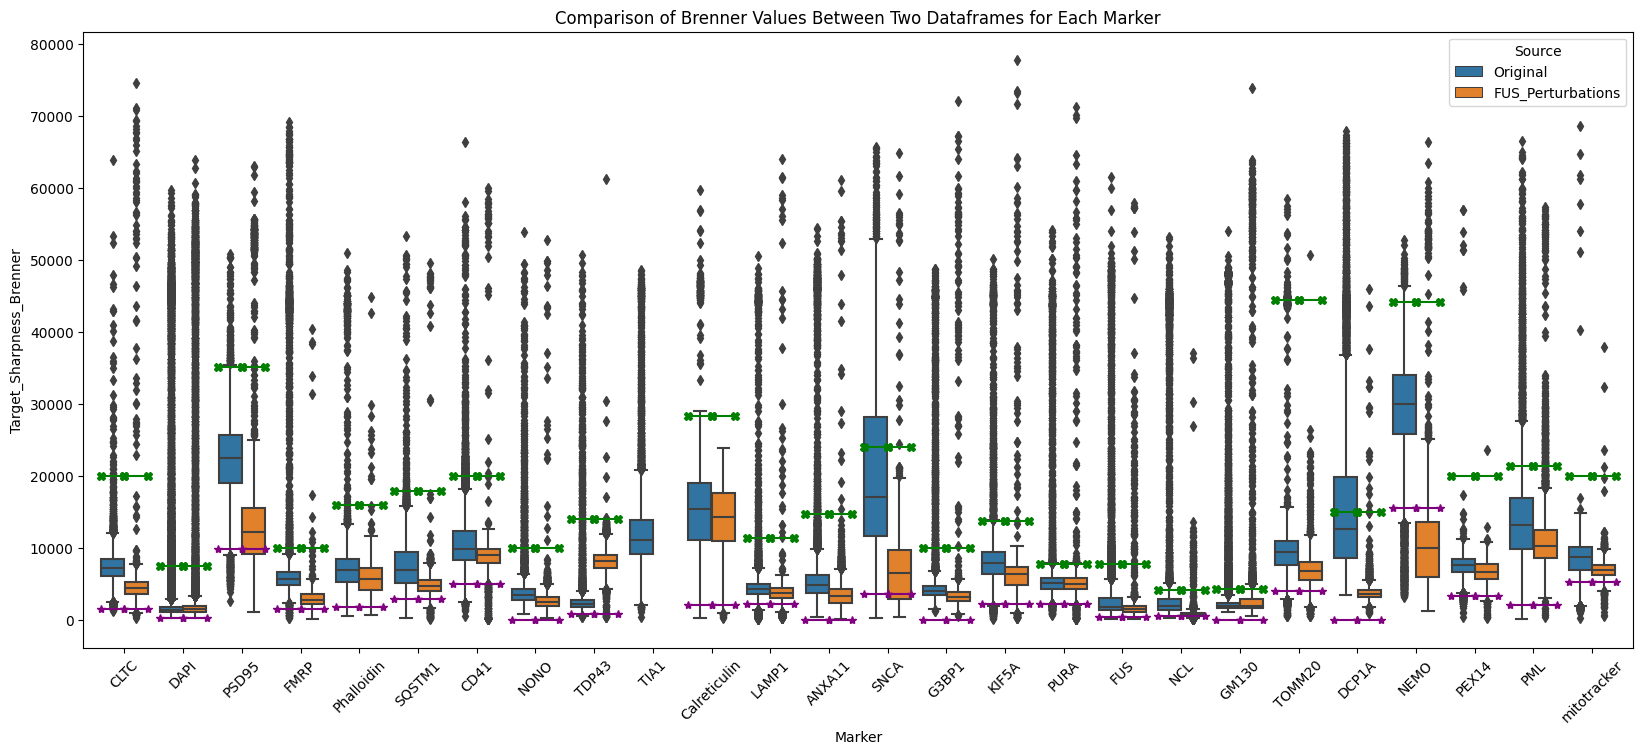

'\n- CLTC\n- PSD95\n- FMRP\n- SQSTM1\n- SCNA\n- TDP43\n- TOMM20\n- DCP1A\n- NEMO\n'

In [11]:
# Combine the dataframes
combined_df = pd.concat([df_original, df_fus])


markers = set(df_original['Marker'].unique()).intersection(set(df_fus['Marker'].unique()))

# Plotting
plt.figure(figsize=(20,8))
sns.boxplot(x='Marker', y='Target_Sharpness_Brenner', hue='Source', data=combined_df)
plt.xticks(rotation=45)
plt.title('Comparison of Brenner Values Between Two Dataframes for Each Marker')
# plt.show()


cutoffs = pd.read_csv("/home/labs/hornsteinlab/Collaboration/MOmaps/src/preprocessing/markers_focus_boundries.csv", index_col=0)
cutoffs.rename(index={'SCNA': 'SNCA'}, inplace=True)
# To annotate the 95th percentile for each group in a boxplot created with seaborn and matplotlib, you can calculate the 95th percentile for each 'Marker' and 'Source' combination in your combined dataframe and then use the matplotlib.pyplot.text() function to place annotations on the plot.

# Here's how you can modify the previous example to include annotations for the 95th percentile:

# Calculate and annotate the 95th percentile for each group
for marker in markers:
    for source in combined_df['Source'].unique():
        subset = combined_df[(combined_df['Marker'] == marker) & (combined_df['Source'] == source)]    
        upper_bound = cutoffs.loc[marker, 'Upper_bound']
        lower_bound = cutoffs.loc[marker, 'Lower_bound']
        percentile_95 = np.percentile(subset['Target_Sharpness_Brenner'], 95)
        percentile_5 = np.percentile(subset['Target_Sharpness_Brenner'], 5)
        
        # Position of the text annotation
        # Adjust `x` for proper alignment, `y` is set to the 95th percentile value
        x_pos = (combined_df['Marker'].unique().tolist().index(marker) +
                 (-0.2 if source == 'Original' else 0.2))  # Adjusting position based on source
        plt.plot([x_pos-0.2, x_pos+0.2], [upper_bound, upper_bound], color='green', marker='X') # green - original upper bound
        # plt.plot([x_pos-0.2, x_pos+0.2], [percentile_95, percentile_95], color='red', marker='^') # red - 95% 
        plt.plot([x_pos-0.2, x_pos+0.2], [lower_bound, lower_bound], color='purple', marker='*') # purple - original lower bound
        # plt.plot([x_pos-0.2, x_pos+0.2], [percentile_5, percentile_5], color='yellow', marker='^') # yellow - 5% 

plt.show()

"""
- CLTC?
- PSD95
- FMRP?
- SQSTM1?
- SCNA
- TDP43?
- TOMM20?
- DCP1A
- NEMO
"""